In [39]:
#importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.30, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

classifiers = ['LinearSVM', 'RadialSVM', 
               'Logistic',  'RandomForest', 
               'AdaBoost',  'DecisionTree', 
               'KNeighbors','GradientBoosting', 'XgBoost']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0),
          xgb.XGBClassifier()]


def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def prec_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    prec = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        prec.append(precision_score(Y_test,predictions))
        j = j+1     
    Score["Precision"] = prec
    Score.sort_values(by="Precision", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def rec_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    rec = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        rec.append(recall_score(Y_test,predictions))
        j = j+1     
    Score["Recall"] = rec
    Score.sort_values(by="Recall", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def f_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    f = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        f.append(f1_score(Y_test,predictions))
        j = j+1     
    Score["F1"] = f
    Score.sort_values(by="F1", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def ra_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    ra = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        ra.append(roc_auc_score(Y_test,predictions))
        j = j+1     
    Score["ROC_AUC"] = ra
    Score.sort_values(by="ROC_AUC", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5,6,7,8,9,10]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

In [28]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)     
        chromosome[:int(0.3*n_feat)]=False             
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)         
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) 


def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross,mutation_rate,n_feat):   
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [29]:
#looking at dataset
data_bc = pd.read_csv(r'C:\Users\nprus\OneDrive\Desktop\Minor project work\Project Resources\Breast cancer_data.csv')
label_bc = data_bc["diagnosis"]
label_bc = np.where(label_bc == 'M',1,0)
data_bc.drop(["id","diagnosis","Unnamed: 32"],axis = 1,inplace = True)

print("Breast Cancer dataset:\n",data_bc.shape[0],"Records\n",data_bc.shape[1],"Features")

Breast Cancer dataset:
 569 Records
 30 Features


In [30]:
display(data_bc.head())
print("All the features in this dataset have continuous values")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


All the features in this dataset have continuous values


In [31]:
#checking accuracy
score1 = acc_score(data_bc,label_bc)
score1

,Classifier,Accuracy
0,XgBoost,0.982456
1,AdaBoost,0.976608
2,Logistic,0.970760
3,LinearSVM,0.964912
4,RandomForest,0.964912
5,KNeighbors,0.959064
6,GradientBoosting,0.959064
7,RadialSVM,0.935673
8,DecisionTree,0.923977


In [32]:
score2 = prec_score(data_bc,label_bc)
score2

,Classifier,Precision
0,RadialSVM,1.000000
1,XgBoost,0.983871
2,KNeighbors,0.982759
3,AdaBoost,0.968254
4,Logistic,0.967742
5,LinearSVM,0.967213
6,RandomForest,0.967213
7,GradientBoosting,0.951613
8,DecisionTree,0.857143


In [33]:
score3 = rec_score(data_bc,label_bc)
score3

,Classifier,Recall
0,AdaBoost,0.968254
1,XgBoost,0.968254
2,Logistic,0.952381
3,DecisionTree,0.952381
4,LinearSVM,0.936508
5,RandomForest,0.936508
6,GradientBoosting,0.936508
7,KNeighbors,0.904762
8,RadialSVM,0.825397


In [34]:
score4 = f_score(data_bc,label_bc)
score4

,Classifier,F1
0,XgBoost,0.976000
1,AdaBoost,0.968254
2,Logistic,0.960000
3,LinearSVM,0.951613
4,RandomForest,0.951613
5,GradientBoosting,0.944000
6,KNeighbors,0.942149
7,RadialSVM,0.904348
8,DecisionTree,0.902256


In [35]:
score5 = ra_score(data_bc,label_bc)
score5

,Classifier,ROC_AUC
0,XgBoost,0.979497
1,AdaBoost,0.974868
2,Logistic,0.966931
3,LinearSVM,0.958995
4,RandomForest,0.958995
5,GradientBoosting,0.954365
6,KNeighbors,0.947751
7,DecisionTree,0.929894
8,RadialSVM,0.912698


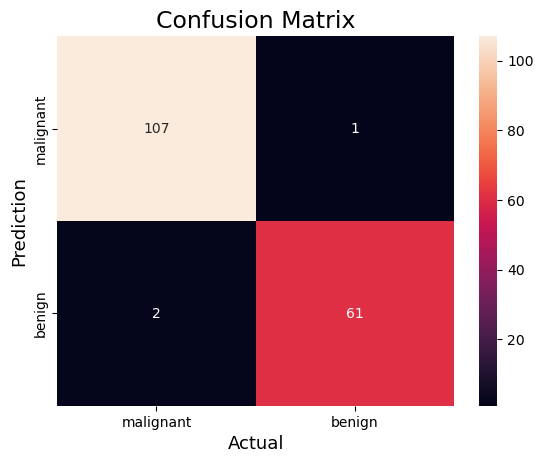

In [36]:
X_train, X_test, y_train, y_test = split(data_bc,label_bc)

# compute the confusion matrix
for i in models:
        model = i
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
        cm = confusion_matrix(y_test,y_pred)
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

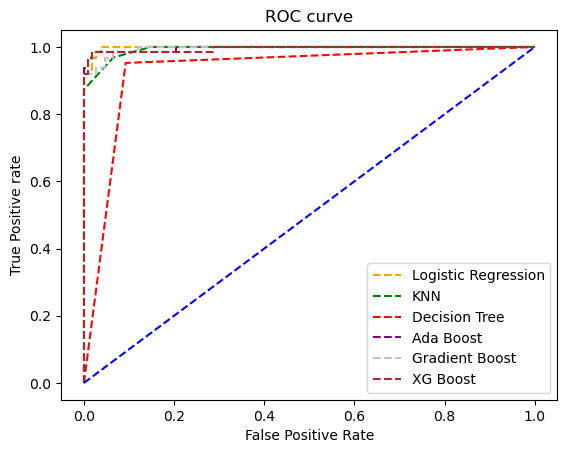

In [23]:
X_train, X_test, y_train, y_test = split(data_bc,label_bc)

# logistic regression
model1 = LogisticRegression(max_iter = 1000)
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
# Decision tree
model3 = DecisionTreeClassifier(random_state=0)
# Ada Boosting
model4 = AdaBoostClassifier(random_state = 0)
# Gradient Boosting
model5 = GradientBoostingClassifier(random_state=0)
# XG Boosting
model6 = xgb.XGBClassifier()

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
pred_prob5 = model5.predict_proba(X_test)
pred_prob6 = model6.predict_proba(X_test)


from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Decision Tree')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='Ada Boost')
plt.plot(fpr5, tpr5, linestyle='--',color='Grey', label='Gradient Boost')
plt.plot(fpr6, tpr6, linestyle='--',color='brown', label='XG Boost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [38]:
#Choosing the best classifier for further calculations
logmodel = xgb.XGBClassifier()
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=10,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Best score in generation 1 : [0.9883040935672515]
Best score in generation 2 : [0.9824561403508771]
Best score in generation 3 : [0.9883040935672515]
Best score in generation 4 : [0.9941520467836257]
Best score in generation 5 : [0.9883040935672515]
Best score in generation 6 : [0.9883040935672515]
Best score in generation 7 : [0.9883040935672515]
Best score in generation 8 : [1.0]
Best score in generation 9 : [0.9941520467836257]
Best score in generation 10 : [0.9883040935672515]


In [41]:
#Choosing the best classifier for further calculations
logmodel = RandomForestClassifier(n_estimators=200, random_state=0)
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=10,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Best score in generation 1 : [0.9883040935672515]
Best score in generation 2 : [0.9824561403508771]
Best score in generation 3 : [0.9883040935672515]
Best score in generation 4 : [0.9883040935672515]
Best score in generation 5 : [0.9883040935672515]
Best score in generation 6 : [0.9941520467836257]
Best score in generation 7 : [0.9941520467836257]
Best score in generation 8 : [0.9883040935672515]
Best score in generation 9 : [0.9883040935672515]
Best score in generation 10 : [0.9941520467836257]


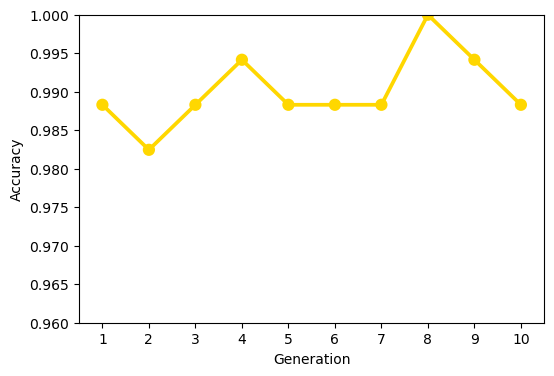

In [40]:
#Visualization
plot(score_bc,0.96,1.0,c = "gold")